<a href="https://colab.research.google.com/github/GermanStanzione/TT-2C2025-Data-Analitycs-Notebooks/blob/main/_26_Clase_15/Mia/Clase_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal

Objetivos:
* Entender que es un modelo de regresión lineal
* Generarlo a partir de un set de entrenamiento/testeo
* Evaluar las métricas para determinar que tan bien performa/generaliza
* Analizar un ejemplo práctico y un caso real

## Presentamos un caso práctico

Recuerdan en clase 11 cuando estudiamos "correlación"?
<BR>
Habíamos generado un dataframe con alturas - pesos.
<BR>
Vamos a retomar ese ejemplo, agregando más observaciones:

In [1]:
# Importamos librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Creamos las variables "Altura_cm" y "Peso_kg" con algunas observaciones
data = {
    "Altura_cm": [150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 158, 172, 178, 188],
    "Peso_kg":   [45, 50, 55, 58, 65, 70, 75, 80, 85, 90, 95, 53, 67, 72, 83]
}

# Y con ellas creamos el dataframe df
df = pd.DataFrame(data)

print("Primeros registros del Dataframe:\n", df.head())

Primeros registros del Dataframe:
    Altura_cm  Peso_kg
0        150       45
1        155       50
2        160       55
3        165       58
4        170       65


In [3]:
# Veamos algunas estadísticas
df.describe()

,Altura_cm,Peso_kg
count,15.000000,15.000000
mean,174.733333,69.533333
std,15.177364,15.263714
min,150.000000,45.000000
25%,162.500000,56.500000
50%,175.000000,70.000000
75%,186.500000,81.500000
max,200.000000,95.000000


In [4]:
# Generemos la matriz de correlacion y analizamos la relación lineal entre las variables
corr_matrix = df.corr()
corr_matrix

,Altura_cm,Peso_kg
Altura_cm,1.000000,0.999338
Peso_kg,0.999338,1.000000


El valor 0.99 indica una fuerte asociación lineal entre las variables Altura_cm y Peso_kg, lo que sugiere que un modelo de regresión lineal podría ajustarse muy bien a estos datos.
<BR>
Generemos un gráfico de dispersión (scatterplot) y otro de dispersión pero con una linea de regresión

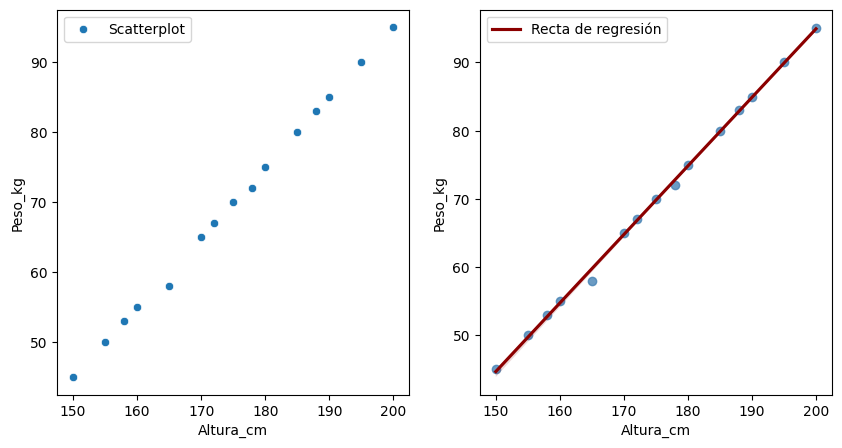

In [5]:
# Estilos y tamaños
plt.figure(figsize=(10,5))

# En el subplot izquierdo, vamos a representar un scatterplot de los datos
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="Altura_cm", y="Peso_kg", label = "Scatterplot")

# En el subplot derecho, vamos a representar además una recta de regresión usnado regplot
plt.subplot(1,2,2)
sns.regplot(
    data=df,
    x="Altura_cm",
    y="Peso_kg",
    color="steelblue",
    line_kws={"color": "darkred", "label": "Recta de regresión"}
)
plt.legend()
plt.show()

## Modelo de regresión lineal simple usando sklearn

Es un modelo que predice un valor numérico usando una recta que mejor se ajusta a los datos.

Ejemplos, predecir:
* Peso por altura
* Precio por metros cuadrados
* Ventas por publicidad

El modelo busca encontrar la mejor recta posible:

y = b0 + b1*x

Donde:
* b0: es el intercepto u ordenada al orígen
* b1: es la pendiente de la recta


Para encontrar los coeficientes b0 y b1, el modelo usa el método de mínimos cuadrados, que busca que los puntos queden lo más cerca posible de la recta.

La idea es minimizar

∑(yi−y^i)2

Es decir, cuanto más pequeños sean los errores, mejor será el modelo.

Para determinar que tan bueno es el modelo, se pueden utilizar estas métricas:

* R2 (o coeficiente de determinación): cuanto más cercano a 1 mejor
* MSE (Mean Square Error): cuanto más pequeño mejor

Generamos un modelo de regresión lineal

In [6]:
# Importamos las librerías
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Hay que particional el dataframe en dos grupos, uno de entrenamiento y otro de testing.
<BR>
Generalmente la relacion entre los conjuntos training/testing es 80/20, 75/25 o 70/30

In [7]:
# Variables independientes o predictoras X
X = df[["Altura_cm"]]

# Variable objetivo o variable respuesta y
y = df["Peso_kg"]

# Split manual - elegimos un 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
# Crear el modelo
model_rl = LinearRegression()

In [9]:
# Entrenamos el modelo a partir de los datos de training
model_rl.fit(X_train, y_train)

LinearRegression()

In [10]:
b1 = model_rl.coef_[0]
b0 = model_rl.intercept_

print(f"Modelo: Peso_kg = {b0:.2f} + {b1:.2f} * Altura_cm")

Modelo: Peso_kg = -107.26 + 1.01 * Altura_cm


In [11]:
# Usamos el modelo resultante para predecir los pesos (y_predict) a partir de las Alturas_cm del conjunto de testing (X_test)
y_pred = model_rl.predict(X_test)

In [12]:
y_pred

array([89.96100796, 52.53899204, 44.44774536])

In [13]:
# Métricas
# Queremos comparara los pesos de la predicción (y_predict) con los pesos del conjunto de testing (t_test)
# Calulando las métricas MSE (Mean Square Error) y R2 (Coeficiente de determinación)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

MSE: 0.1730113019393087
R²: 0.9995497103188393


El valor obtenido de R2 muy cercano a 1 indica un muy buen ajuste del modelo, sumado a un valor muy pequeño de MSE. Decidimos adoptar el modelo.
<BR>
Comparemos las predicciones sobre los valores de nuestro df

In [14]:
# Creamos una tercer columna llamada "Peso_kg_pred", generada a partir de las predicciones del modelo sobre las Alturas_cm
df["Peso_kg_pred"] = model_rl.predict(X)
df

,Altura_cm,Peso_kg,Peso_kg_pred
0,150,45,44.447745
1,155,50,49.504775
2,160,55,54.561804
3,165,58,59.618833
4,170,65,64.675862
5,175,70,69.732891
6,180,75,74.789920
7,185,80,79.846950
8,190,85,84.903979
9,195,90,89.961008


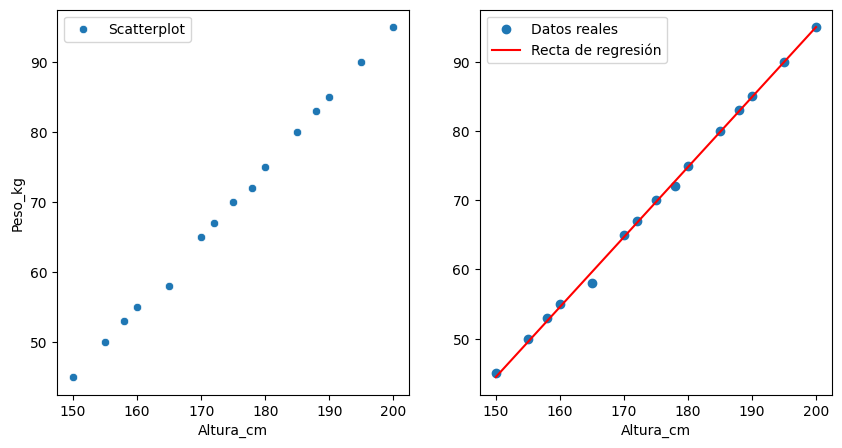

In [15]:
# Agregemos un gráfico
# Ahora
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="Altura_cm", y="Peso_kg", label="Scatterplot")

plt.subplot(1,2,2)
plt.scatter(X, y, label="Datos reales")
sns.lineplot(x=X["Altura_cm"], y=model_rl.predict(X), color="red", label="Recta de regresión")

plt.legend()
plt.show()


Finalmente, usemos nuestro modelo para calcular cuál es el peso de una persona a partir de su altura

In [ ]:
# Dada la altura en cm 130, veamos cuál es su peso
peso = model_rl.predict([[175]])
print("El peso obtenido para una altura de 175 cm es: ", peso)

In [ ]:
# Dada la altura en cm 90, veamos cuál es su peso
peso = model_rl.predict([[120]])
print("El peso obtenido para una altura de 120 cm es: ", peso)

**Conclusión**:
<BR>
como el modelo model_lr fue entrenado con valores de Alturas_cm comprendidas entre 150 y 190 cm, no podemos garantizar la validez de las predicciones fuera de ese rango.

##  Modelo de regresión lineal simple usando statsmodels
Sklearn sirve para construir modelos predictivos y no ofrece estadísticas detalladas.
Para obtener una tabla completa con coeficientes, p-valores e intervalos usamos statsmodels.
<BR>
Veamos entonces, a modo de referencia, como entrenar el mismo modelo de regresión lineal pero usando statsmodel

In [ ]:
import statsmodels.api as sm

# Agregar la constante para el intercepto
# Agrega una columna llamada "const" llena de 1s a tu matriz de entrada.
X_sm = sm.add_constant(X)

# Entrenar el modelo OLS
modelo_sm = sm.OLS(y, X_sm).fit()

# Ver el resumen completo (muy útil para clase)
print(modelo_sm.summary())

# -----------------------------------------------
# Predicción con intervalos
# -----------------------------------------------

nueva_altura = pd.DataFrame({
    "const": 1,
    "Altura_cm": [160]
})

pred = modelo_sm.get_prediction(nueva_altura)
intervalos = pred.summary_frame(alpha=0.05)  # 95% CI

print("\nPredicción con intervalos:")
print(intervalos)


# Aplicamos a un caso real

## Carga de datos + EDA

Vamos a trabajar con un dataset de precios de propiedades de Amsterdam
[Dataset en Github](https://raw.githubusercontent.com/kuntala-c/Amsterdam-Housing-Price-Analysis/refs/heads/main/HousingPrices-Amsterdam-August-2021.csv)

In [ ]:
# Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importamos el dataset desde Github

url = "https://raw.githubusercontent.com/kuntala-c/Amsterdam-Housing-Price-Analysis/refs/heads/main/HousingPrices-Amsterdam-August-2021.csv"
df = pd.read_csv(url)

df.head()


Lo que nos interesa predecir es el valor de la propiedad a partir de los metros cuadrados, es decir, generar un modelo al que yo le pase los metros cuadrados de una propiedad y me retorne el precio.
<BR>
Por lo tanto, de nuestro dataset, las variables de importancia van a ser:

* Area: variable independiente o predictora
* Price: variable dependiente u objetivo

In [ ]:
# Analicemos el dataframe, si hay nulos y tipo de datos
df.info()

Notamos que la variable a predecir Price es del tipo float64, pero Area, que es nuestra variable predictora del tipo object. Eso se debe a que algun valor es no numerico, veamos de resolverlo:

In [ ]:
# Usamos pd.to_numeric para convertir object a floar y errors='coerce'
# para que complete con NaN aquellos valores que no pueda convertir
df["Area"] = pd.to_numeric(df["Area"], errors='coerce')

# Y luego removemos los NaN
df = df.dropna(subset=["Area", "Price"])


In [ ]:
# Veamos algunas estadísticas
df.describe()

In [ ]:
# Seleccionamos solo las columnas que nos interesan
df = df[["Area", "Price"]]
df.head()

In [ ]:
# Generemos un Histograma para analizar la distribución de las frecuencias de Price y Area
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.histplot(data=df, x="Price")
plt.title("Distribución de los precios")

plt.subplot(1,2,2)
sns.histplot(data=df, x="Area")
plt.title("Distribución de las superficies")

In [ ]:
# Generemos un Boxplot para analizar las medidas cenrtales de Price y Area
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, x="Price")
plt.title("Medidas centrales de precios")

plt.subplot(1,2,2)
sns.boxplot(data=df, x="Area")
plt.title("Medidas centrales de superficies")

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df, y="Price", x="Area")
plt.title("Dispersión Precios - Superficies")

plt.subplot(1,2,2)
sns.regplot(
    data=df,
    x="Area",
    y="Price",
    color="steelblue",
    line_kws={"color": "darkred", "label": "Recta de regresión"}
)
plt.title("Dispersión Precios - Superficies + regresión")

Veamos ahora el nivel de asociación lineal entre las variables.
<BR>
Siii para eso tenemos la matriz de correlación

In [ ]:
# Usamos el método corr() para generar la matriz de correlación
correlacion = df.corr()
correlacion

Un valor de 0.83 indica fuerte asociación lineal, asi que generemos nuestro modelo de regresión lineal!

## Generamos el modelo de regresión lineal

In [ ]:
# Importamos las librerías
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

Hay que particional el dataframe en dos grupos, uno de entrenamiento y otro de testing.
Generalmente la relacion entre los conjuntos training/testing es 80/20, 75/25 o 70/30

In [ ]:
# Variables independientes o predictoras X
X = df[["Area"]]

# Variable objetivo o variable respuesta y
y = df["Price"]

# Split manual - elegimos un 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Crear el modelo
model_rl = LinearRegression()

In [ ]:
# Entrenamos el modelo a partir de los datos de training
model_rl.fit(X_train, y_train)

In [ ]:
b1 = model_rl.coef_[0]
b0 = model_rl.intercept_

print(f"Modelo: Price = {b0:.2f} + {b1:.2f} * Area")

In [ ]:
# Usamos el modelo resultante para predecir los pesos (y_predict) a partir de las Alturas_cm del conjunto de testing (X_test)
y_pred = model_rl.predict(X_test)

In [ ]:
# Métricas
# Queremos comparara los precios de la predicción (y_predict) con los precios del conjunto de testing (t_test)
# Calulando las métricas MSE (Mean Square Error) y R2 (Coeficiente de determinación)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

In [ ]:
# Dada la superficie de una casa, veamos cuál es su precio
price = model_rl.predict([[100]])
print("El precio obtenido para una altura de 100 cm es: ", price)

**Conclusión**:
<BR>
En este análisis aplicamos un modelo de regresión lineal simple para estudiar la relación entre las variables del dataset. Si bien observamos una asociación moderadamente fuerte (r ≈ 0.8), el modelo no logró capturar toda la variabilidad presente en los datos. Esto se refleja en un R² limitado, que indica que una parte importante del comportamiento de la variable objetivo no puede explicarse únicamente mediante una relación lineal.

Además, la presencia de cierta dispersión, valores atípicos y posibles relaciones no lineales sugiere que la regresión lineal puede no ser el modelo más adecuado para este problema. La estructura de los datos podría requerir modelos más flexibles, capaces de adaptarse a patrones complejos sin imponer la restricción de linealidad.

En este sentido, resulta natural dejar abierta la exploración de técnicas de Machine Learning más avanzadas, como:

* Árboles de decisión para regresión
* Random Forest
* Gradient Boosting (XGBoost, LightGBM)
* k-Nearest Neighbors (KNN) Regressor
* Modelos polinomiales o no lineales

Estos modelos permiten capturar relaciones más complejas, manejar mejor la interacción entre variables y, en muchos casos, ofrecen un desempeño predictivo superior.

En resumen: la regresión lineal es un excelente punto de partida para comprender relaciones básicas, pero este caso muestra la importancia de avanzar hacia modelos de Machine Learning capaces de adaptarse mejor a la estructura real de los datos.